In [47]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (auc, confusion_matrix, roc_curve, accuracy_score, precision_score, roc_auc_score)
from sklearn.metrics import f1_score
from itertools import product
warnings.filterwarnings('ignore')

In [3]:
default = pd.read_csv(r'/Users/user/Library/Containers/com.microsoft.Excel/Data/Downloads/Loan_Default.csv', index_col=[0])
default

year loan_limit             Gender approv_in_adv loan_type  \
ID                                                                   
24890   2019         cf  Sex Not Available         nopre     type1   
24891   2019         cf               Male         nopre     type2   
24892   2019         cf               Male           pre     type1   
24893   2019         cf               Male         nopre     type1   
24894   2019         cf              Joint           pre     type1   
...      ...        ...                ...           ...       ...   
173555  2019         cf  Sex Not Available         nopre     type1   
173556  2019         cf               Male         nopre     type1   
173557  2019         cf               Male         nopre     type1   
173558  2019         cf             Female         nopre     type1   
173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
ID                                                                         
24890            p1                l1        nopc                  nob/c   
24891            p1                l1        nopc                    b/c   
24892            p1                l1        nopc                  nob/c   
24893            p4                l1        nopc                  nob/c   
24894            p1                l1        nopc                  nob/c   
...             ...               ...         ...                    ...   
173555           p3                l1        nopc                  nob/c   
173556           p1                l1        nopc                  nob/c   
173557           p4                l1        nopc                  nob/c   
173558           p4                l1        nopc                  nob/c   
173559           p3                l1        nopc                  nob/c   

        loan_amount  ...  credit_type  Credit_Score  co-applicant_credit_type  \
ID                   ...                                                        
24890        116500  ...          EXP           758                       CIB   
24891        206500  ...         EQUI           552                       EXP   
24892        406500  ...          EXP           834                       CIB   
24893        456500  ...          EXP           587                       CIB   
24894        696500  ...         CRIF           602                       EXP   
...             ...  ...          ...           ...                       ...   
173555       436500  ...          CIB           659                       EXP   
173556       586500  ...          CIB           569                       CIB   
173557       446500  ...          CIB           702                       EXP   
173558       196500  ...          EXP           737                       EXP   
173559       406500  ...          CIB           830                       CIB   

          age submission_of_application        LTV Region  Security_Type  \
ID                                                                         
24890   25-34                   to_inst  98.728814  south         direct   
24891   55-64                   to_inst        NaN  North         direct   
24892   35-44                   to_inst  80.019685  south         direct   
24893   45-54                  not_inst  69.376900  North         direct   
24894   25-34                  not_inst  91.886544  North         direct   
...       ...                       ...        ...    ...            ...   
173555  55-64                   to_inst  71.792763  south         direct   
173556  25-34                  not_inst  74.428934  south         direct   
173557  45-54                  not_inst  61.332418  North         direct   
173558  55-64                   to_inst  70.683453  North         direct   
173559  45-54                  not_inst  72.849462  North         direct   

       Status dtir1  
ID                   
24890       1  45.0  

In [6]:
#I observed that the complete column of my dataset was'nt showing in my work giving me an error, was i needed to set it to display all when called
pd.set_option("display.max_columns", default.shape[-1]) 
default.head(20)

year loan_limit             Gender approv_in_adv loan_type  \
ID                                                                  
24890  2019         cf  Sex Not Available         nopre     type1   
24891  2019         cf               Male         nopre     type2   
24892  2019         cf               Male           pre     type1   
24893  2019         cf               Male         nopre     type1   
24894  2019         cf              Joint           pre     type1   
24895  2019         cf              Joint           pre     type1   
24896  2019         cf              Joint           pre     type1   
24897  2019        NaN             Female         nopre     type1   
24898  2019         cf              Joint         nopre     type1   
24899  2019         cf  Sex Not Available         nopre     type3   
24900  2019         cf               Male         nopre     type2   
24901  2019         cf  Sex Not Available         nopre     type1   
24902  2019         cf              Joint         nopre     type2   
24903  2019         cf              Joint         nopre     type2   
24904  2019         cf             Female         nopre     type1   
24905  2019         cf               Male         nopre     type1   
24906  2019         cf              Joint         nopre     type2   
24907  2019         cf               Male           pre     type1   
24908  2019         cf             Female         nopre     type1   
24909  2019         cf  Sex Not Available         nopre     type1   

      loan_purpose Credit_Worthiness open_credit business_or_commercial  \
ID                                                                        
24890           p1                l1        nopc                  nob/c   
24891           p1                l1        nopc                    b/c   
24892           p1                l1        nopc                  nob/c   
24893           p4                l1        nopc                  nob/c   
24894           p1                l1        nopc                  nob/c   
24895           p1                l1        nopc                  nob/c   
24896           p3                l1        nopc                  nob/c   
24897           p4                l1        nopc                  nob/c   
24898           p3                l1        nopc                  nob/c   
24899           p3                l1        nopc                  nob/c   
24900           p3                l2        nopc                    b/c   
24901           p3                l1        nopc                  nob/c   
24902           p3                l1        nopc                    b/c   
24903           p4                l1        nopc                    b/c   
24904           p4                l1        nopc                  nob/c   
24905           p4                l1        nopc                  nob/c   
24906           p1                l1        nopc                    b/c   
24907           p3                l1        nopc                  nob/c   
24908           p1                l1        nopc                  nob/c   
24909           p4                l1        nopc                  nob/c   

       loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
ID                                                                            
24890       116500               NaN                   NaN              NaN   
24891       206500               NaN                   NaN              NaN   
24892       406500             4.560                0.2000           595.00   
24893       456500             4.250                0.6810              NaN   
24894       696500             4.000                0.3042             0.00   
24895       706500             3.990                0.1523           370.00   
24896       346500             4.500                0.9998          5120.00   
24897       266500             4.125                0.2975          5609.88   
24898       376500             4.875           

In [7]:
#observing the statistical distribution of the continuous variables in the dataset
default.describe()

year   loan_amount  rate_of_interest  Interest_rate_spread  \
count  148670.0  1.486700e+05     112231.000000         112031.000000   
mean     2019.0  3.311177e+05          4.045476              0.441656   
std         0.0  1.839093e+05          0.561391              0.513043   
min      2019.0  1.650000e+04          0.000000             -3.638000   
25%      2019.0  1.965000e+05          3.625000              0.076000   
50%      2019.0  2.965000e+05          3.990000              0.390400   
75%      2019.0  4.365000e+05          4.375000              0.775400   
max      2019.0  3.576500e+06          8.000000              3.357000   

       Upfront_charges           term  property_value         income  \
count    109028.000000  148629.000000    1.335720e+05  139520.000000   
mean       3224.996127     335.136582    4.978935e+05    6957.338876   
std        3251.121510      58.409084    3.599353e+05    6496.586382   
min           0.000000      96.000000    8.000000e+03       0.000000   
25%         581.490000     360.000000    2.680000e+05    3720.000000   
50%        2596.450000     360.000000    4.180000e+05    5760.000000   
75%        4812.500000     360.000000    6.280000e+05    8520.000000   
max       60000.000000     360.000000    1.650800e+07  578580.000000   

        Credit_Score            LTV         Status          dtir1  
count  148670.000000  133572.000000  148670.000000  124549.000000  
mean      699.789103      72.746457       0.246445      37.732932  
std       115.875857      39.967603       0.430942      10.545435  
min       500.000000       0.967478       0.000000       5.000000  
25%       599.000000      60.474860       0.000000      31.000000  
50%       699.000000      75.135870       0.000000      39.000000  
75%       800.000000      86.184211       0.000000      45.000000  
max       900.000000    7831.250000       1.000000      61.000000

In [8]:
#study the shape of the data
default.shape


(148670, 33)

In [9]:
#checking to understand the income variable
default.income.info()

<class 'pandas.core.series.Series'>
Int64Index: 148670 entries, 24890 to 173559
Series name: income
Non-Null Count   Dtype  
--------------   -----  
139520 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [10]:
#It can be observed that the columns have both lower and uppercases, i am converting to lowercases
default.columns.str.lower()

Index(['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [11]:
#chcek the summary statistic of the continuous variables rounded up in two 
round(default.describe(),2)

year  loan_amount  rate_of_interest  Interest_rate_spread  \
count  148670.0    148670.00         112231.00             112031.00   
mean     2019.0    331117.74              4.05                  0.44   
std         0.0    183909.31              0.56                  0.51   
min      2019.0     16500.00              0.00                 -3.64   
25%      2019.0    196500.00              3.62                  0.08   
50%      2019.0    296500.00              3.99                  0.39   
75%      2019.0    436500.00              4.38                  0.78   
max      2019.0   3576500.00              8.00                  3.36   

       Upfront_charges       term  property_value     income  Credit_Score  \
count        109028.00  148629.00       133572.00  139520.00     148670.00   
mean           3225.00     335.14       497893.47    6957.34        699.79   
std            3251.12      58.41       359935.32    6496.59        115.88   
min               0.00      96.00         8000.00       0.00        500.00   
25%             581.49     360.00       268000.00    3720.00        599.00   
50%            2596.45     360.00       418000.00    5760.00        699.00   
75%            4812.50     360.00       628000.00    8520.00        800.00   
max           60000.00     360.00     16508000.00  578580.00        900.00   

             LTV     Status      dtir1  
count  133572.00  148670.00  124549.00  
mean       72.75       0.25      37.73  
std        39.97       0.43      10.55  
min         0.97       0.00       5.00  
25%        60.47       0.00      31.00  
50%        75.14       0.00      39.00  
75%        86.18       0.00      45.00  
max      7831.25       1.00      61.00

<AxesSubplot: xlabel='age', ylabel='count'>

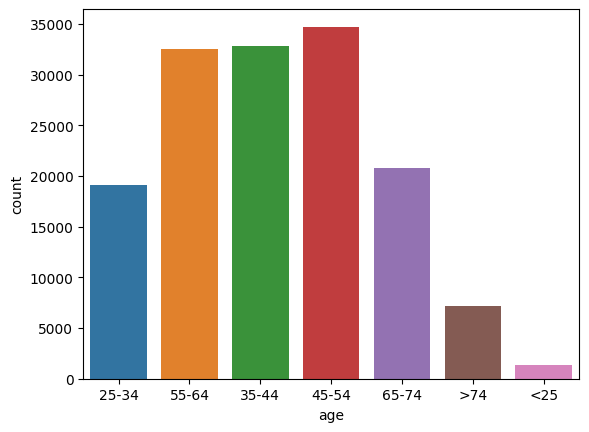

In [12]:
#studying some of the variables using graphical representation
sns.countplot(data=default , x='age')

<AxesSubplot: xlabel='Gender', ylabel='count'>

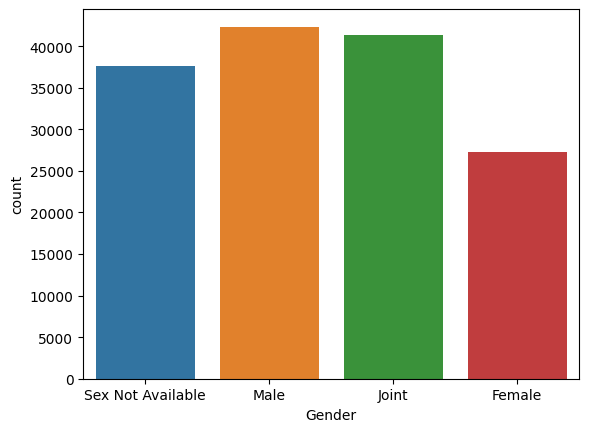

In [13]:
sns.countplot(data=default , x='Gender')

<AxesSubplot: xlabel='Region', ylabel='count'>

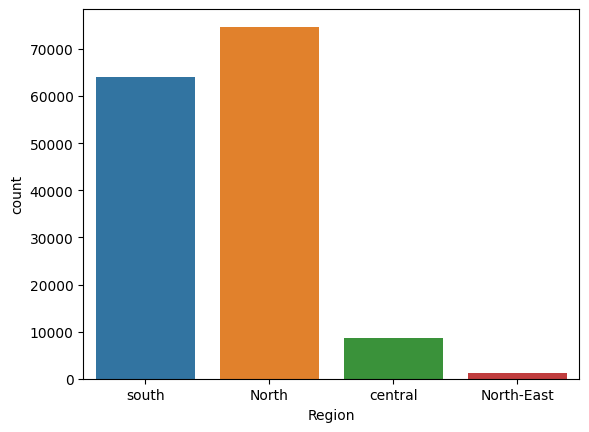

In [14]:
sns.countplot(data=default , x='Region')

<AxesSubplot: xlabel='Status', ylabel='count'>

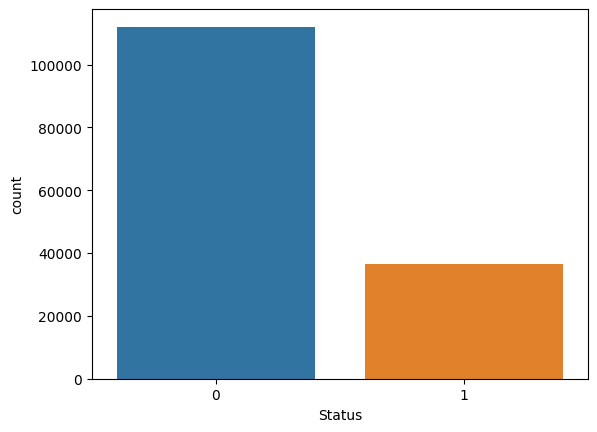

In [15]:
sns.countplot(data=default , x='Status')

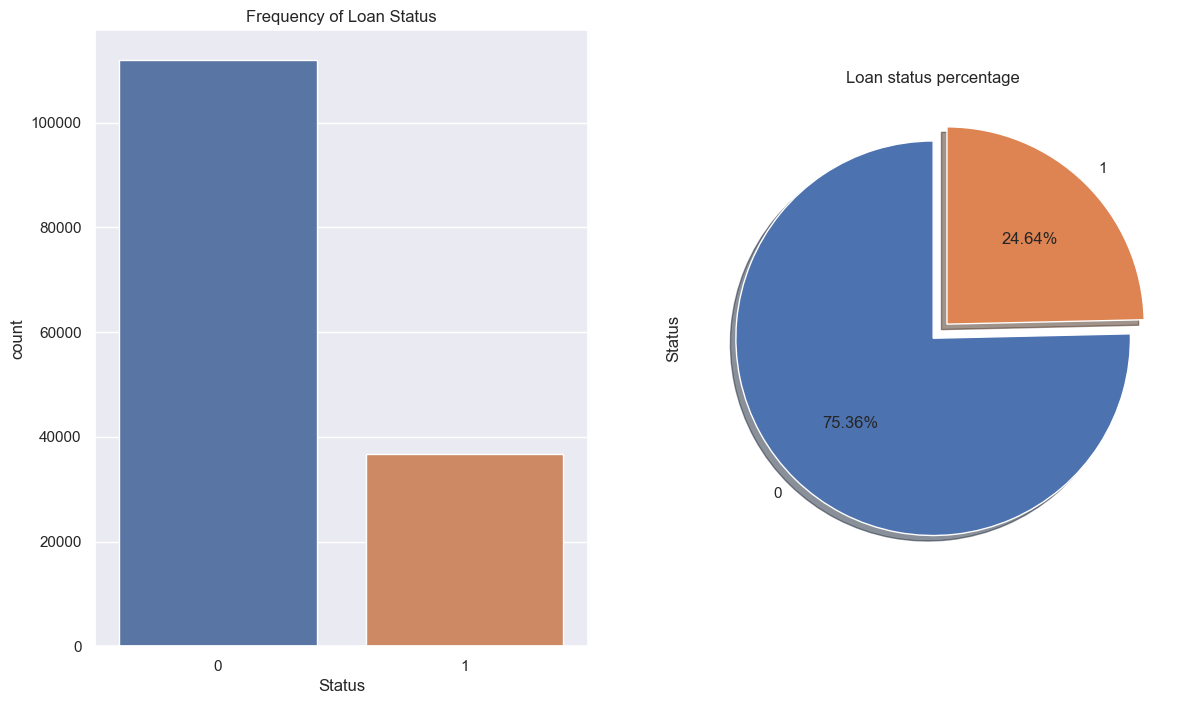

In [16]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='Status',data=default,ax=axs[0])
axs[0].set_title("Frequency of Loan Status")
default.Status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Loan status percentage")
plt.show()

<Figure size 1000x600 with 0 Axes>

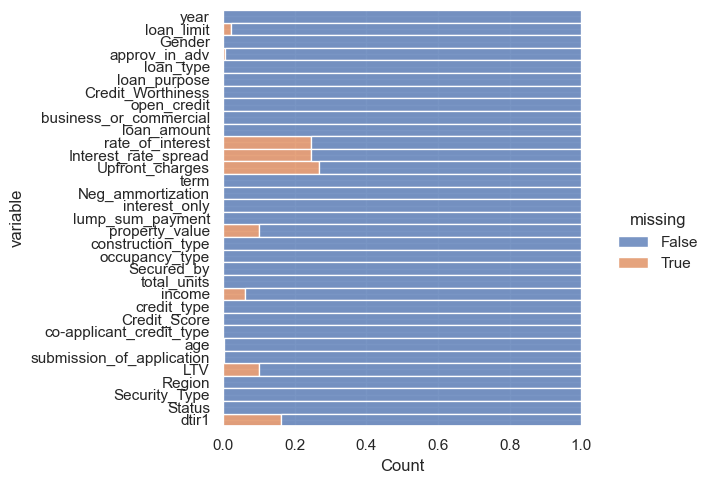

In [17]:
#using a seaborn to show the attributes or varaibles with missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=default.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show()

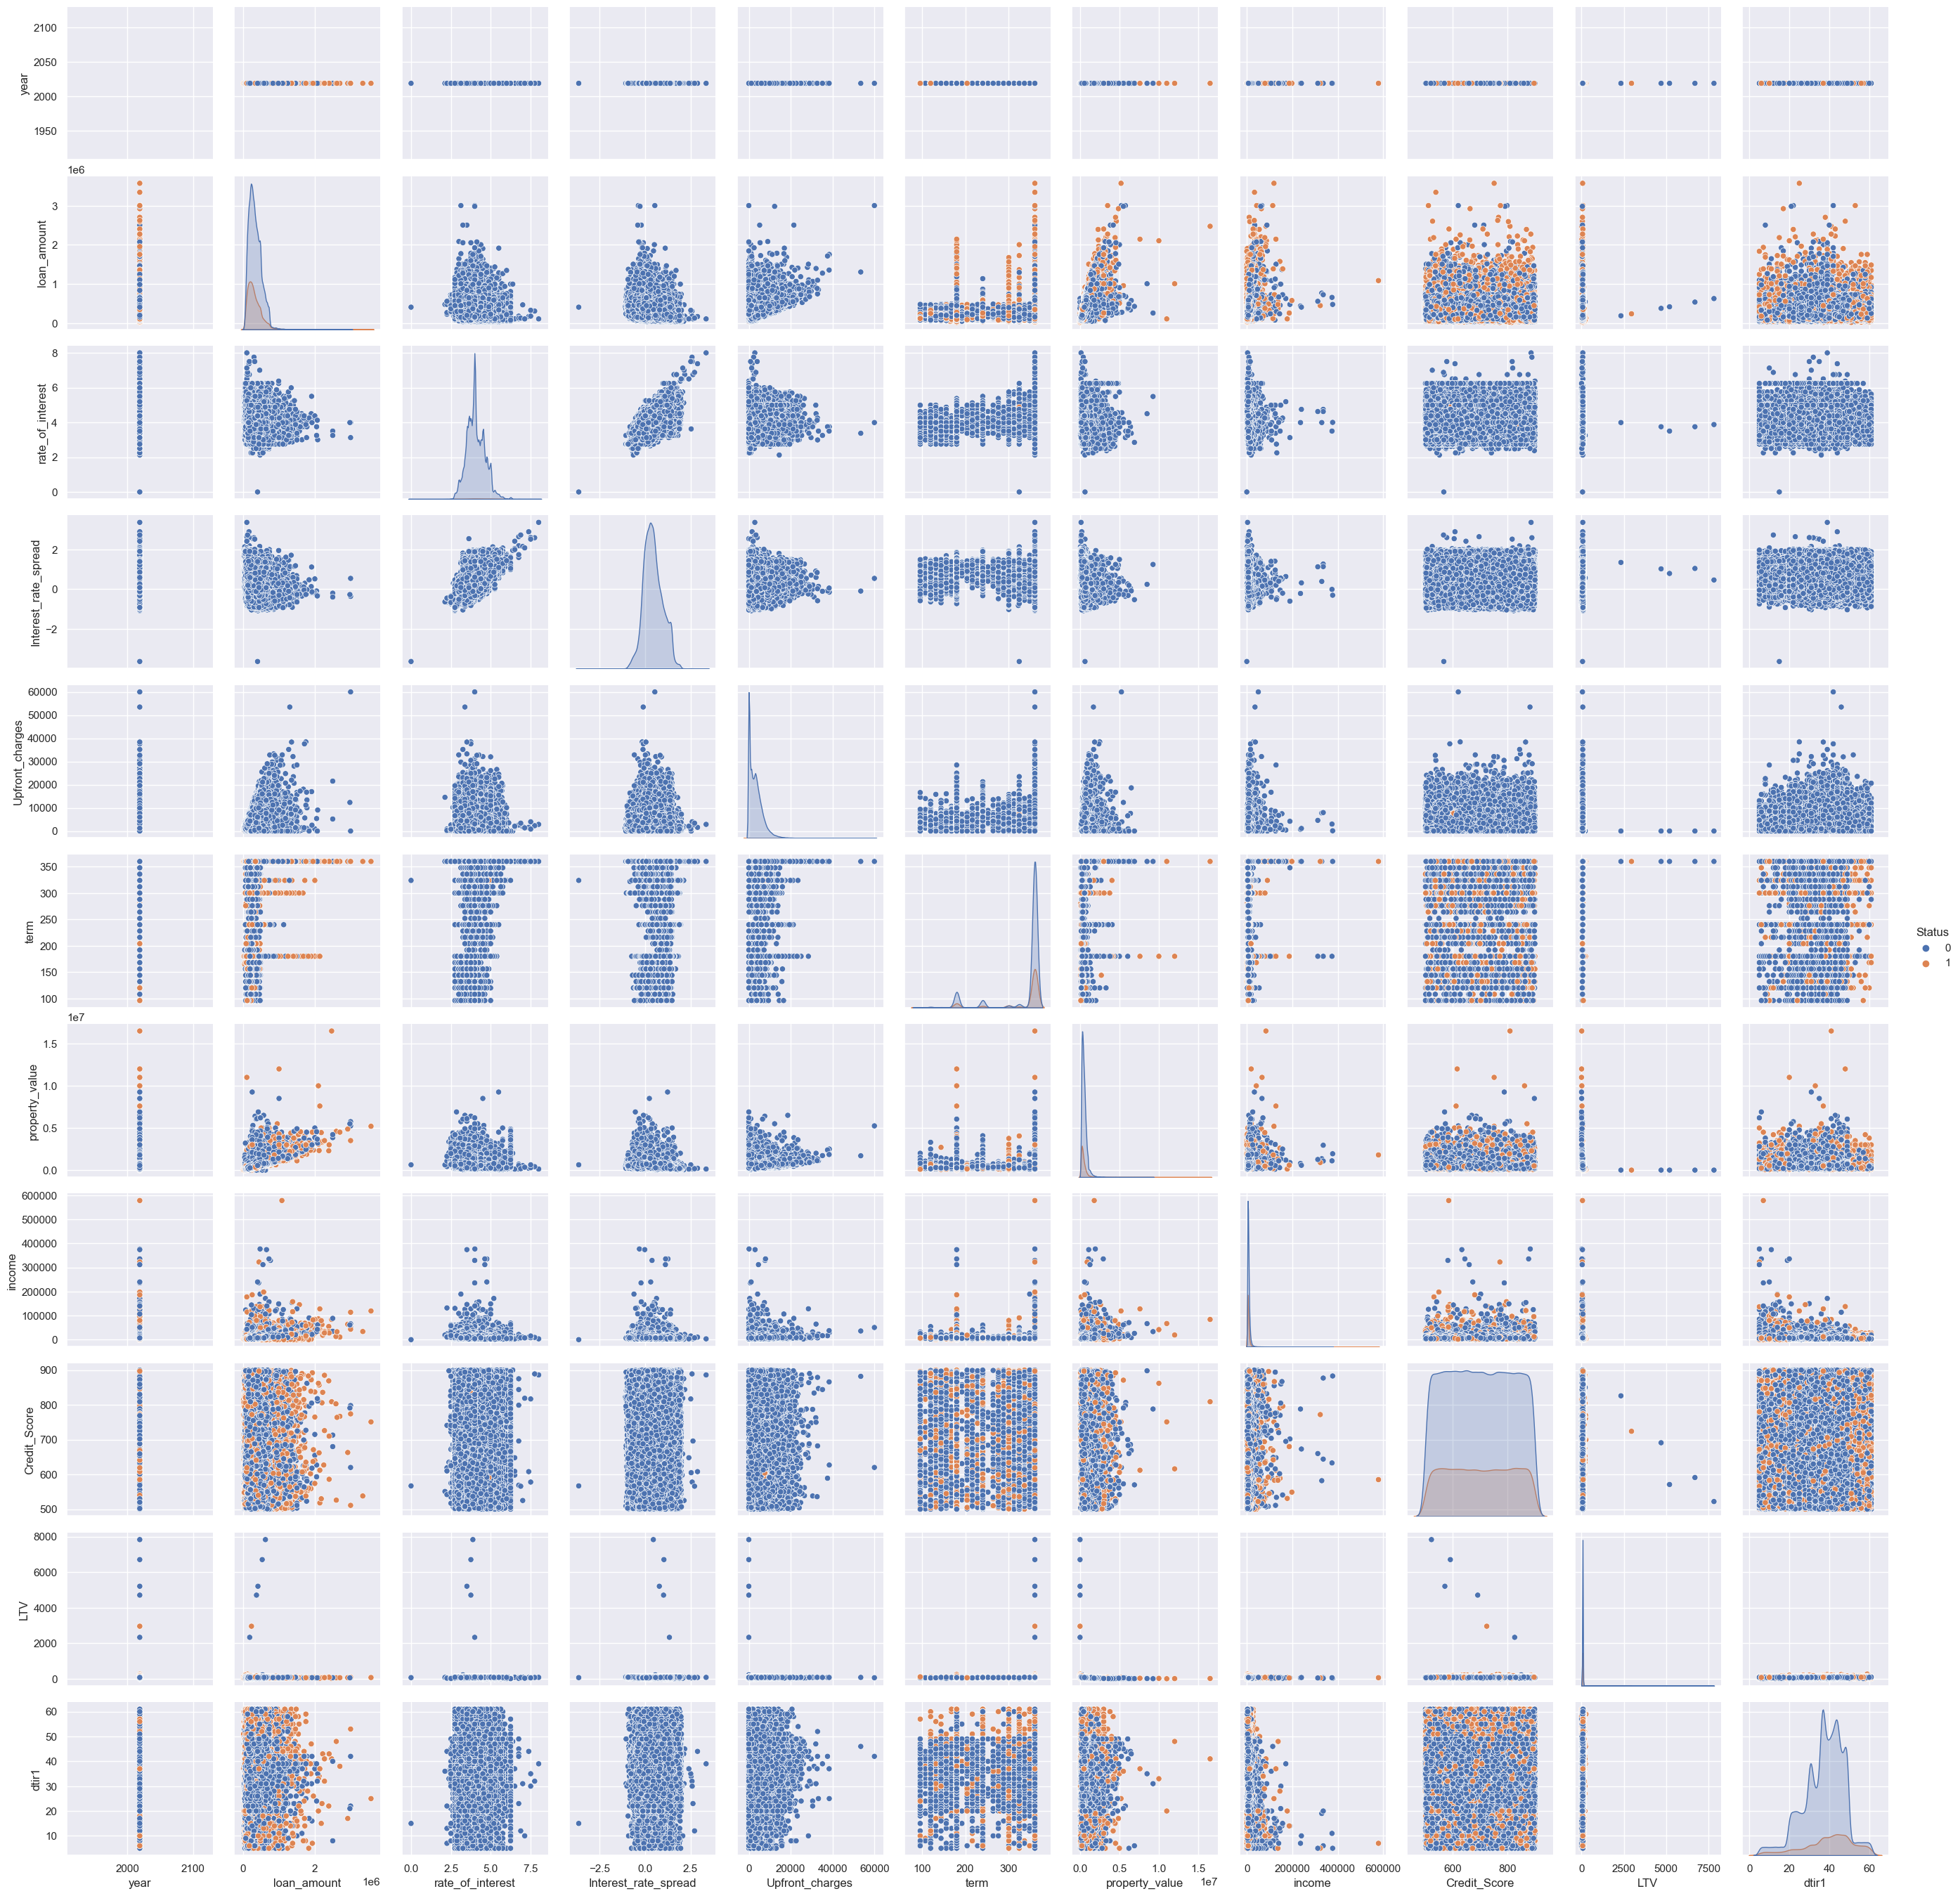

In [18]:
#using a seaborn pairplot to show the relationship between the dataset, using the target variable as the hue
sns.pairplot(default, hue = 'Status')

<AxesSubplot: >

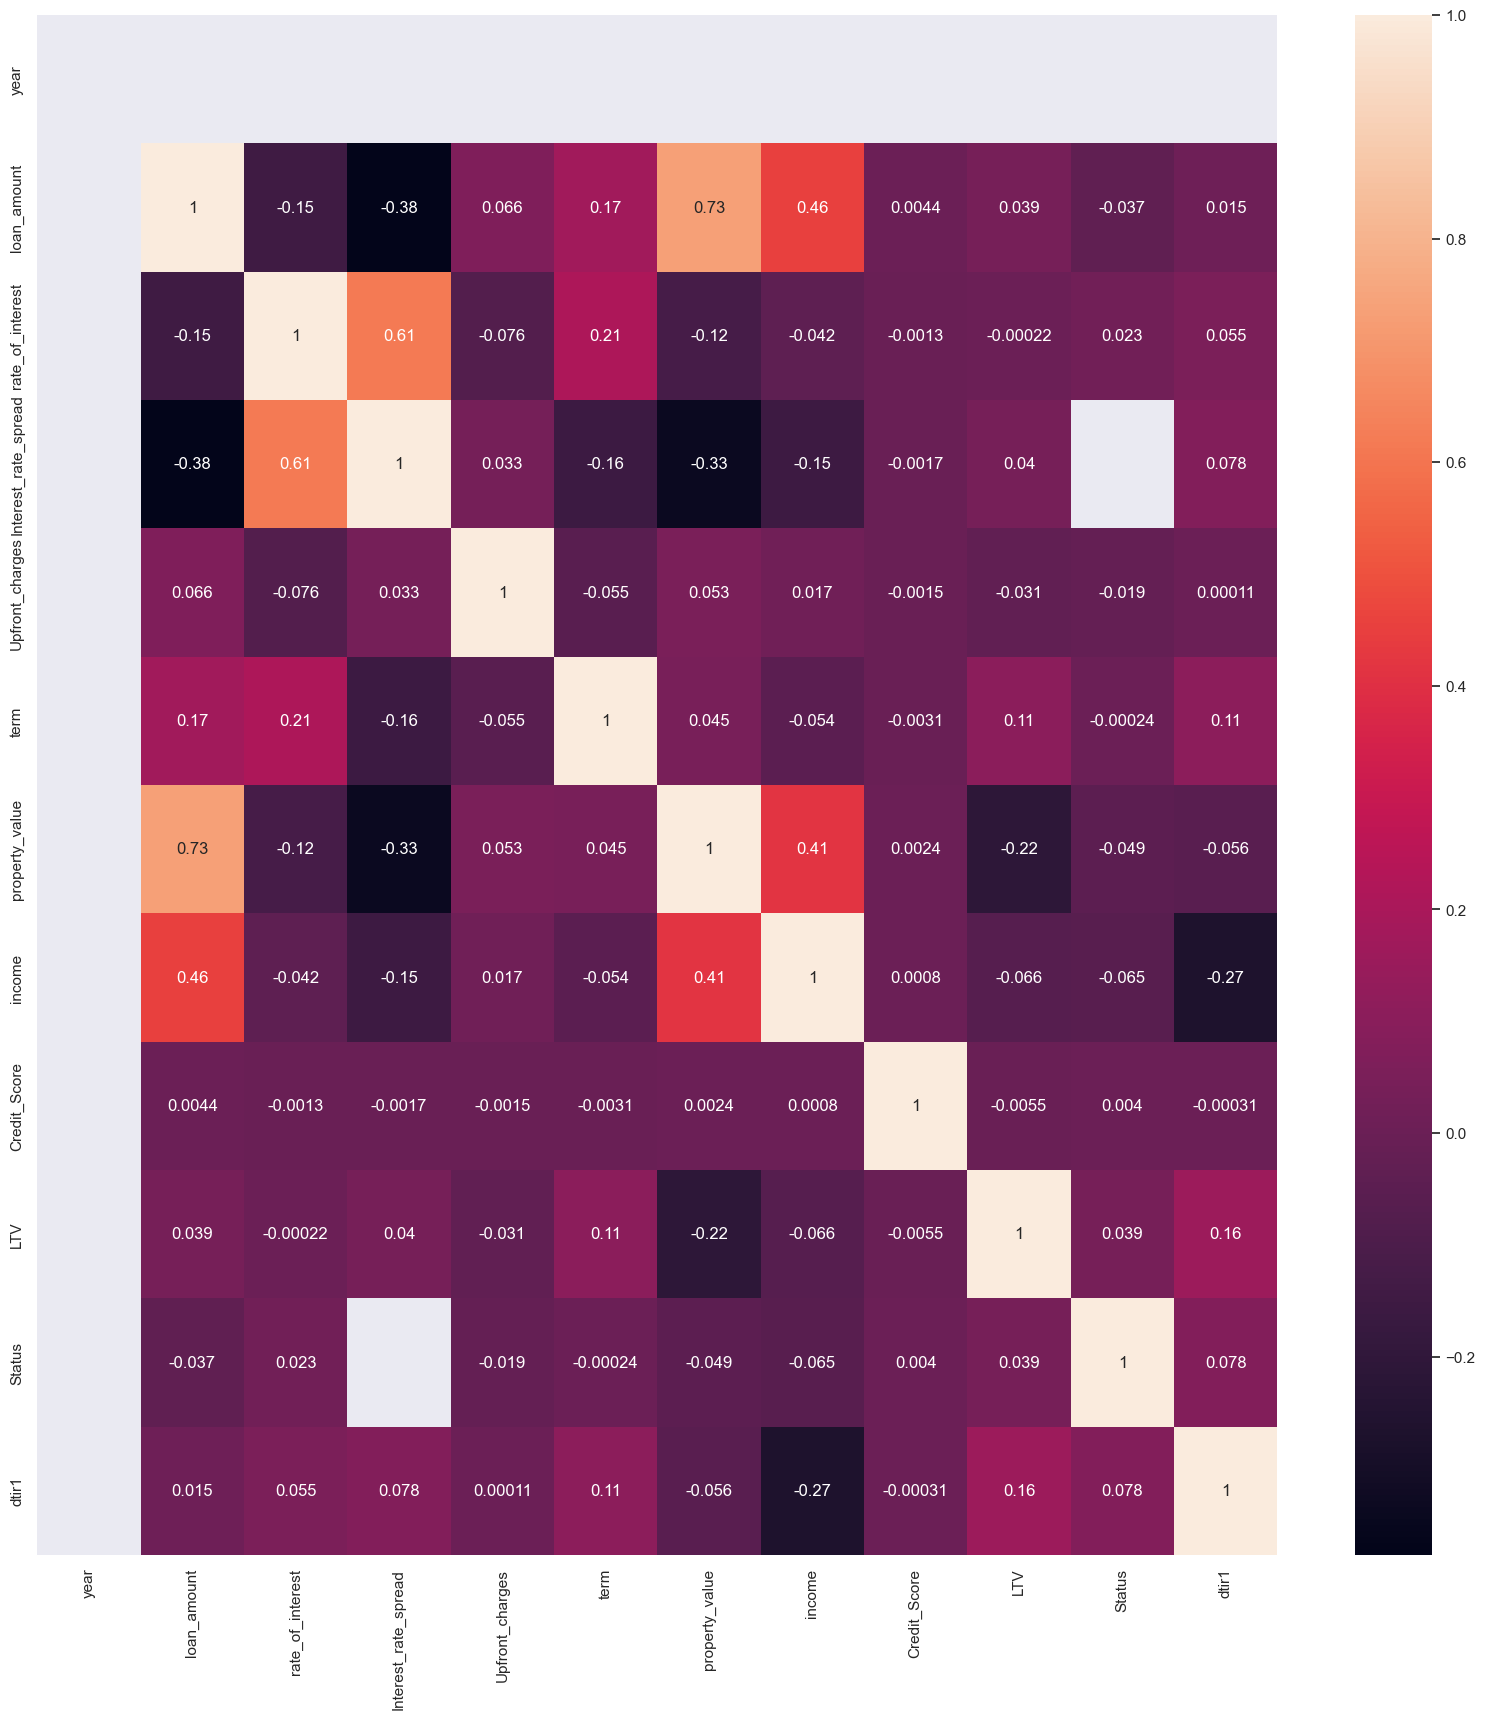

In [19]:
#showing the collinearity of the data with a heatmap
plt.figure(figsize = (20,20))
sns.heatmap(default.corr() , annot = True)

<AxesSubplot: xlabel='age', ylabel='Credit_Score'>

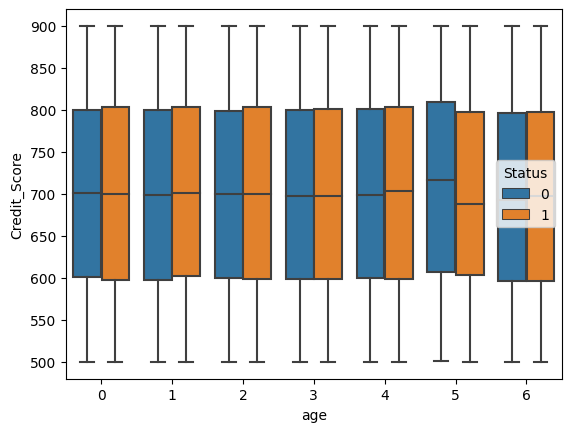

In [22]:
#using the boxplot to understand the relationship of age, credict score and the target variable 'status'
sns.boxplot(data=default , x='age' , y ='Credit_Score' , hue='Status')

In [23]:
#normalizing some of the data variables
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
default[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(default[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])


imputer = SimpleImputer(strategy='most_frequent')
default[['age' ,'loan_limit']] = imputer.fit_transform(default[['age' , 'loan_limit']])

In [24]:
#dropping the NAs as their loss will not cause significant change in the cause of the analysis
default.dropna(inplace = True)

In [25]:
#checking the data that are objects
objList = default.select_dtypes(include = "object").columns
print (objList)

Index([], dtype='object')


In [26]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    default[i] = le.fit_transform(default[i].astype(str))

print (default.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147315 entries, 24890 to 173559
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       147315 non-null  int64  
 1   loan_limit                 147315 non-null  int64  
 2   Gender                     147315 non-null  int64  
 3   approv_in_adv              147315 non-null  int64  
 4   loan_type                  147315 non-null  int64  
 5   loan_purpose               147315 non-null  int64  
 6   Credit_Worthiness          147315 non-null  int64  
 7   open_credit                147315 non-null  int64  
 8   business_or_commercial     147315 non-null  int64  
 9   loan_amount                147315 non-null  int64  
 10  rate_of_interest           147315 non-null  float64
 11  Interest_rate_spread       147315 non-null  float64
 12  Upfront_charges            147315 non-null  float64
 13  term                     

## Machine Learning
This stage starts with splitting the data into train and test in a ratio of 70:30 and three different ML models are built

In [27]:
#the data is scaled
from sklearn.preprocessing import scale
x = default.drop('Status', axis=1)
y = default['Status']

In [28]:
x.shape

(147315, 32)

In [29]:
#checking the count of the target variables
y.value_counts()

0    111176
1     36139
Name: Status, dtype: int64

In [30]:
#using the train test split function, the data is splitted for both training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

 X_train: (103120, 32)
 X_test: (44195, 32)
 y_train: (103120,)
 y_test: (44195,)


In [31]:
# Random forest 
#this is the first model built
clf_rf = RandomForestClassifier(random_state = 50, n_estimators=50, max_depth=5, 
                                min_samples_leaf=30, max_features=4)
clf_rf.fit(x_train, y_train)
pred_clf_rf = clf_rf.predict(x_test)
proba_clf_rf = clf_rf.predict_proba(x_test)

print(accuracy_score(y_test,pred_clf_rf))
print(classification_report(y_test, pred_clf_rf , labels=[0, 1]))

#the random forest gave an accuracy of 98%
#The classification report also shows the other evaluation metrics that can be used to determine how accurately or well, the model had performed

0.9885507410340536
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33324
           1       1.00      0.95      0.98     10871

    accuracy                           0.99     44195
   macro avg       0.99      0.98      0.98     44195
weighted avg       0.99      0.99      0.99     44195



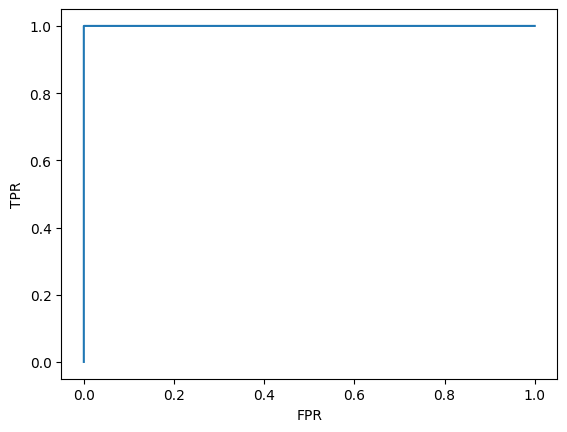

In [44]:
#in a bid to further check the accuracy of this data as we are comparing against different algorithms, the ROC Value curves is also plotted
y_pred_proba=proba_clf_rf [:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

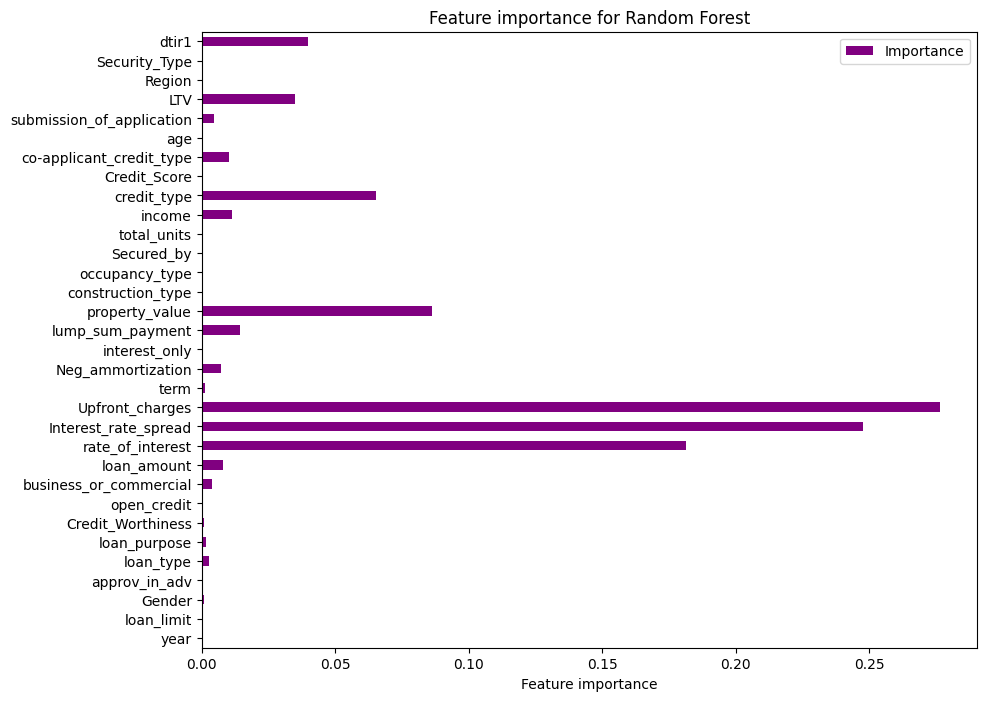

In [52]:
#trying to check for the variables that contributed to the building of the model ie feature importance
features_log = pd.DataFrame(clf_rf.feature_importances_, index=x.columns.tolist(),
                            columns = ['Importance'])
feature_logs = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(10,8), color='purple')
plt.xlabel('Feature importance')
plt.title('Feature importance for Random Forest')
plt.show

In [32]:
# Decision tree 
#the second model built
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=10, max_features=None)
clf_dt.fit(x_train, y_train)
pred_clf_dt = clf_dt.predict(x_test)
proba_clf_dt = clf_dt.predict_proba(x_test)

print(accuracy_score(y_test,pred_clf_dt))
print(classification_report(y_test, pred_clf_dt , labels=[0, 1]))

#the decision tree gave an accuracy of 99%
#The classification report also shows the other evaluation metrics that can be used to determine how accurately or well, the model had performed

0.9999547460119923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33324
           1       1.00      1.00      1.00     10871

    accuracy                           1.00     44195
   macro avg       1.00      1.00      1.00     44195
weighted avg       1.00      1.00      1.00     44195



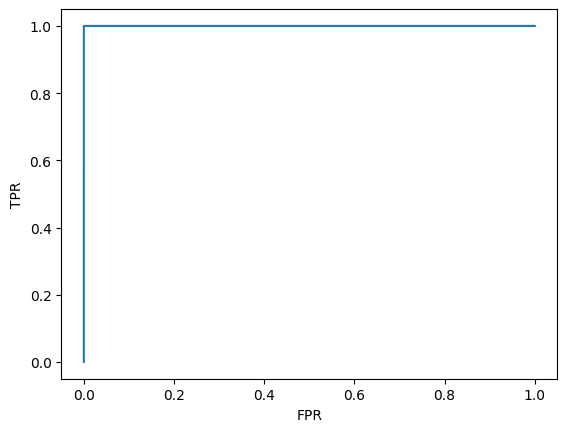

In [43]:
#in a bid to further check the accuracy of this data as we are comparing against different algorithms, the ROC Value curves is also plotted
y_pred_proba=proba_clf_rf [:,1]
y_pred_proba=proba_clf_dt [:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

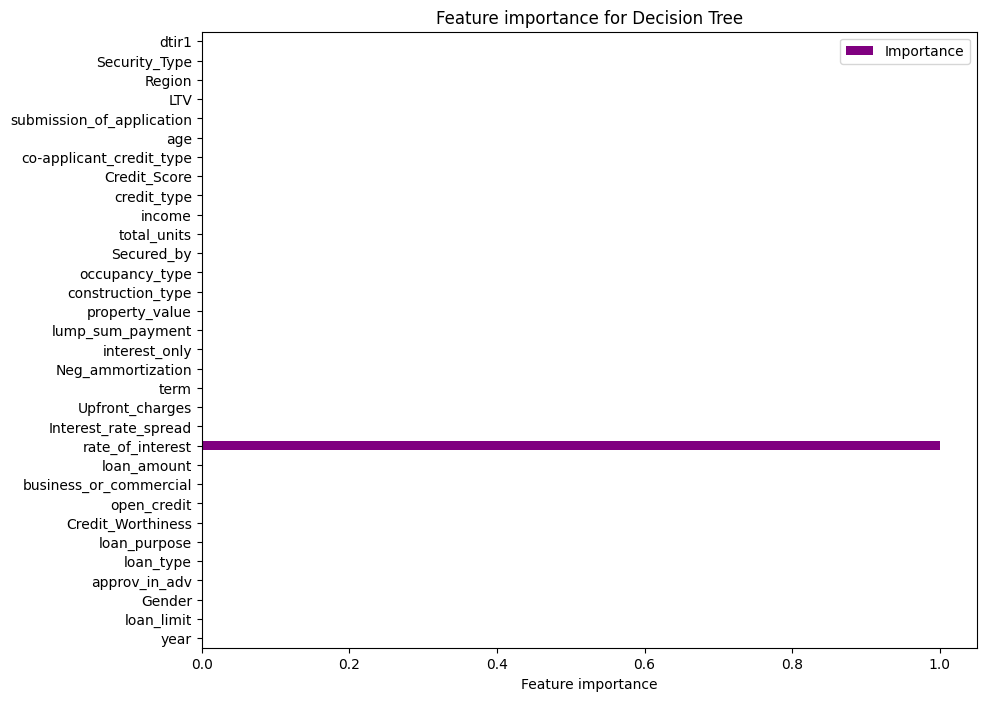

In [56]:
#trying to check for the variables that contributed to the building of the model ie feature importance
features_log = pd.DataFrame(clf_dt.feature_importances_, index=x.columns.tolist(),
                            columns = ['Importance'])
feature_logs = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(10,8), color='purple')
plt.xlabel('Feature importance')
plt.title('Feature importance for Decision Tree')
plt.show

#the graph shows that for this decision tree, only the rate of interest shows to be important for this model building

In [55]:
#logistic regression
#the 3rd model built
clf_logit = LogisticRegression()
clf_logit.fit(x_train, y_train)
pred_clf_logit = clf_logit.predict(x_test)
proba_clf_logit = clf_logit.predict_proba(x_test)

print(accuracy_score(y_test,pred_clf_logit))
print(classification_report(y_test, pred_clf_logit , labels=[0, 1]))

#the logustic regression shows an accuracy of 75%
#The classification report also shows the other evaluation metrics that can be used to determine how accurately or well, the model had performed

0.7540219481841838
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     33324
           1       0.00      0.00      0.00     10871

    accuracy                           0.75     44195
   macro avg       0.38      0.50      0.43     44195
weighted avg       0.57      0.75      0.65     44195



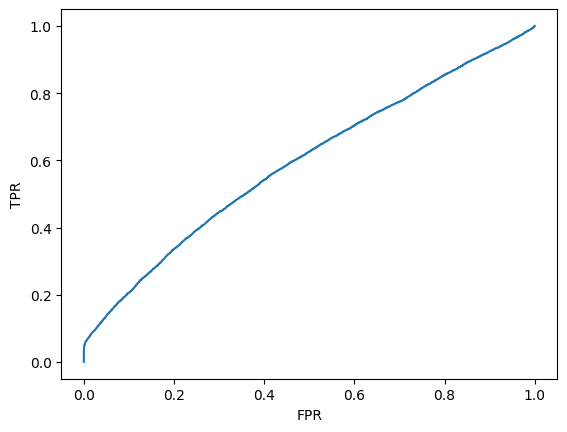

In [42]:
#in a bid to further check the accuracy of this data as we are comparing against different algorithms, the ROC Value curves is also plotted
y_pred_proba=proba_clf_logit [:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()



In [34]:
# Setting thresholds
thres = 0.5
target_predict_logit = np.where(proba_clf_logit[:,1] > thres, 1, 0)
target_predict_tree = np.where(proba_clf_dt[:,1] > thres, 1, 0)
target_predict_rf = np.where(proba_clf_rf[:,1] > thres, 1, 0)
target_actual = y_test


In [35]:
# Confusion matrix
#the confusion matrix is another evaluation to further check the performance of a model

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))


% positive in train set (count/total): 24.50% (25268/103120)
% positive in test set (count/total): 24.60% (10871/44195)


In [36]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[33324     0]
 [10871     0]]
Normalized confusion matrix
[[100.   0.]
 [100.   0.]]


<Figure size 640x480 with 0 Axes>

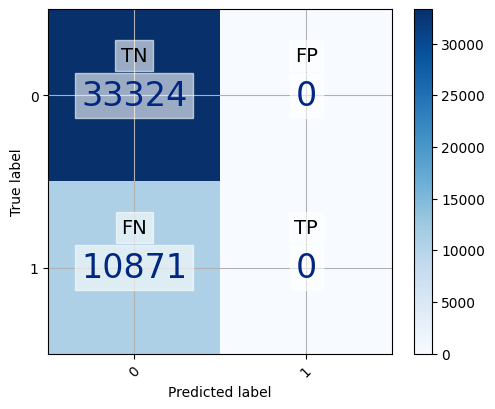

<Figure size 640x480 with 0 Axes>

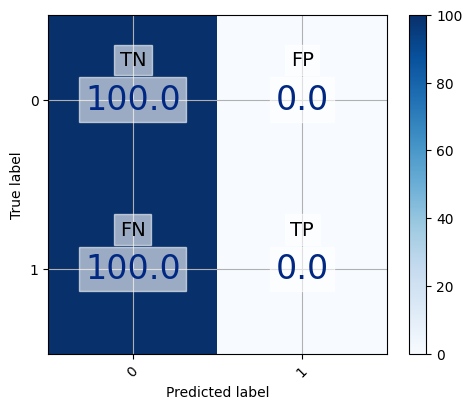

<Figure size 640x480 with 0 Axes>

In [37]:
class_names = ['0', '1']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

Confusion matrix, without normalization
[[33322     2]
 [    0 10871]]
Normalized confusion matrix
[[9.99939983e+01 6.00168047e-03]
 [0.00000000e+00 1.00000000e+02]]


<Figure size 640x480 with 0 Axes>

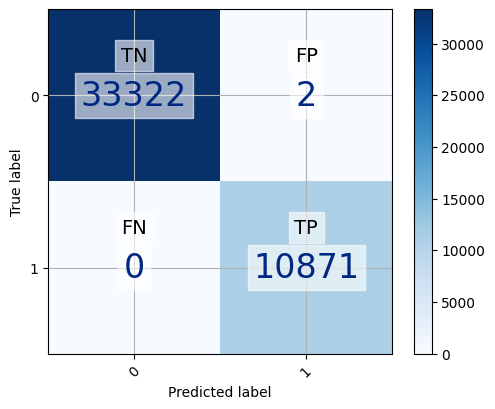

<Figure size 640x480 with 0 Axes>

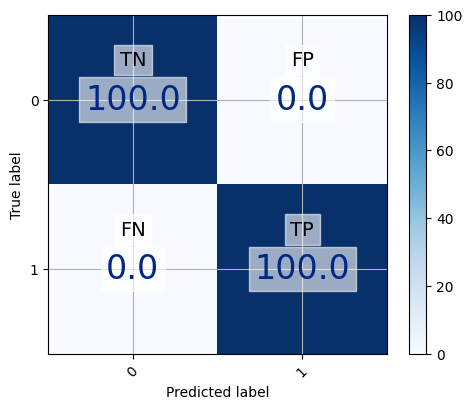

In [38]:
# Plot the confusion matrix for the decision tree
tree_cfn = confusion_matrix(target_actual, target_predict_tree)
tree_tn, tree_fn, tree_fp, tree_tp = confusion_matrix(target_actual, target_predict_tree).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

Confusion matrix, without normalization
[[33324     0]
 [  506 10365]]
Normalized confusion matrix
[[100.           0.        ]
 [  4.65458559  95.34541441]]


<Figure size 640x480 with 0 Axes>

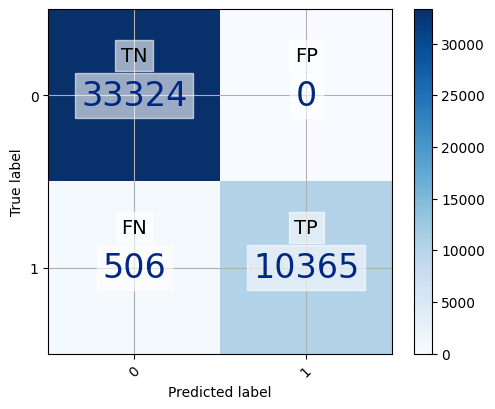

<Figure size 640x480 with 0 Axes>

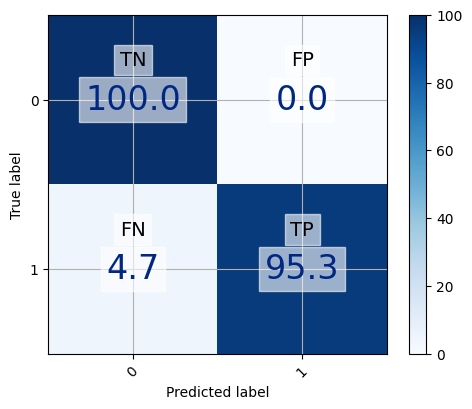

In [39]:
#confusion matrix for random forest
rf_cfn = confusion_matrix(target_actual, target_predict_rf)
rf_tn, rf_fn, rf_fp, rf_tp = confusion_matrix(target_actual, target_predict_rf).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)